<a href="https://colab.research.google.com/github/neuralsrg/LinearAlgebra/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principal component analysis)

PCA assumes that the data is `normally distributed` ($Σ$ marix shows us std along the corresponding vector)

Usually data is stored in X in a column-wise order 
$$
X = 
\begin{bmatrix}
\cdots & x_1 & \cdots\\
\cdots & x_2 & \cdots\\
& \vdots &
\end{bmatrix}
$$

But here I prefer to store it column-wise like in SVD

## Algorithm
1.  Compute mean row $ x_{mean} $
2.  $ B = X - x_{mean} $ - mean centered data. $ B = \frac{B}{\sqrt{N}} $ - unit gaussian
3.  Compute covatiance matrix (correlation matrix from SVD) of the rows of B:
$ C = B^TB $
4.  Compute eigen vectors of C:

$$ v_1^TB^TBv_1, $$ where $ v_1 $ is the biggest eigen vector

$$ CV = VD, D - \text{eigen values}, V - \text{eigen vectors} $$

$$ T = BV, T - \text{principal components}, V - \text{the loadings} $$

In terms of SVD:
$$ X = U\Sigma V^T, T = UΣ $$

The eigen values  $ \lambda \text{ stored in } D $ from $ CV = VD $ describe how much of the variance is captured by the respective vector of loading. $ \lambda = \sigma ^2 $.

How much of the energy is captured by the first $k$ vectors of loading?
$$ \frac{\sum_{j=1}^{k} \lambda_j}{\sum_{j=1}^{m} \lambda_j} $$

### Creating gaussian dataset

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import numpy as np

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


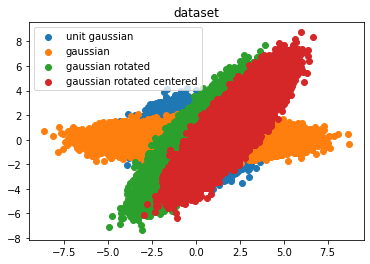

In [46]:
# unit gaussian distribution
N = 100000
X = np.random.randn(2, N)
plt.title('dataset')

plt.scatter(X[0], X[1], label='unit gaussian')

# change principal axes

axes = np.array([2, 0.5])
X_princ = np.diag(axes) @ X

plt.scatter(X_princ[0], X_princ[1], label='gaussian')

# rotation
theta = np.pi / 3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
X_rotated = R @ X_princ

plt.scatter(X_rotated[0], X_rotated[1], label='gaussian rotated')

# moving center position

C = np.array([2, 1]).reshape(2, 1)
X_centered = X_rotated + C

plt.scatter(X_centered[0], X_centered[1], label='gaussian rotated centered')

plt.legend()

In [57]:
# SVD
Xavg = np.expand_dims(np.mean(X_centered, axis=1), axis=-1)
B = X_centered - Xavg

U, S, VT = np.linalg.svd(B / np.sqrt(N), full_matrices=False)
U, S, VT

(array([[-0.50022796, -0.86589375],
        [-0.86589375,  0.50022796]]),
 array([2.00118013, 0.49966595]),
 array([[ 3.18349396e-04,  4.64405107e-03, -1.59767760e-03, ...,
         -3.05695676e-03,  2.72115424e-03,  9.75365496e-06],
        [-2.64482903e-03,  2.34542467e-03, -3.87465399e-03, ...,
         -6.40980968e-03,  1.47180524e-03, -5.52495784e-03]]))

$\Sigma$ matrix shows data `standart deviation` ($\sqrt{Var}$) along each U column vector

U matrix is `unitary` when using `np.linalg.svd(X, full_matrices=True)`. But this situation is VERY computationaly expensive. In practice we always use `np.linalg.svd(X, full_matrices=False)`. This gives us $ U $ matrix of shape $ (n, m) $ instead of $ (n, n) \text{ since } n >> m$. 

In this case U is not unitary any more, but the columns of U are still orthogonal to each other. (Hence, the principal components are othogonal).

Theoretical U matrix (of shape $ (n, n) $) represents the orthogonal basis of n-dimensional space. While U matrix of shape $ (n, m) $ contains only m vectors of the basis, which are capable of restoring the entire dataset of m elements on which the SVD was computed. 

To add any new vector we compute its projection onto m elements of basis. This projection might not represent the new element exactly as it is since the entire space is n-dimensional.

`Projection:` $ projection = U_r^Tx $   (where projection is a set of r coefficients of x decomposition; $r <= m$)

`Representation in r-dimensional space:` $ x_{proj} = U*projection$

Note: Since theoretical U matrix is (n, n) and it is unitary => $UU^Tx = x$. (Intuition: n columns of U represent basis in n-dimensional spaca, so any element from this space can be precisely represented by the basis). But when U is (n, m), $UU^T \not = I$ and any element from n-dimensional space can not be represented precisely.

(-6.0, 8.0)

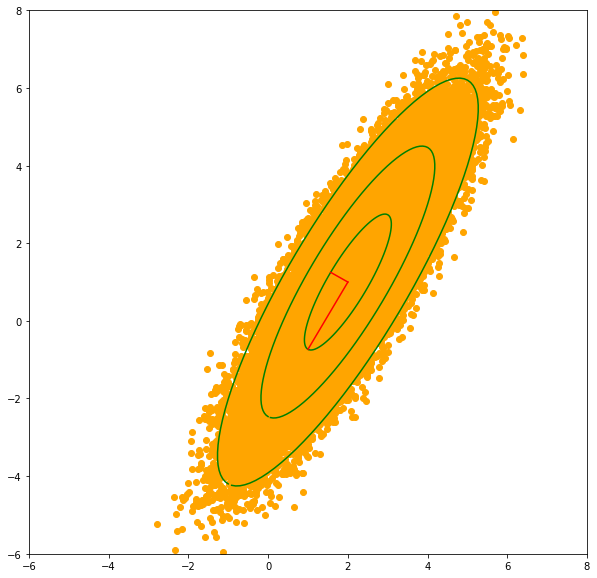

In [62]:
plt.scatter(X_centered[0], X_centered[1], color='orange')

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# ellipsis in U column vector space (1-std confident interval)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# ellipsis 
els = [Xavg + k*Xstd for k in [1, 2, 3]]
for el in els:
  plt.plot(el[0], el[1], '-', color='green')

# principal components
pc_vectors = (U @ np.diag(S)).T # pc_vectors[0] - 1st vector etc.
for vector in pc_vectors:
  plt.plot(np.array([Xavg[0], Xavg[0] + vector[0]]),
           np.array([Xavg[1], Xavg[1] + vector[1]]), color='red')
  
plt.ylim([-6, 8])
plt.xlim([-6, 8])

### Projections onto U vectors (normalized principal components)



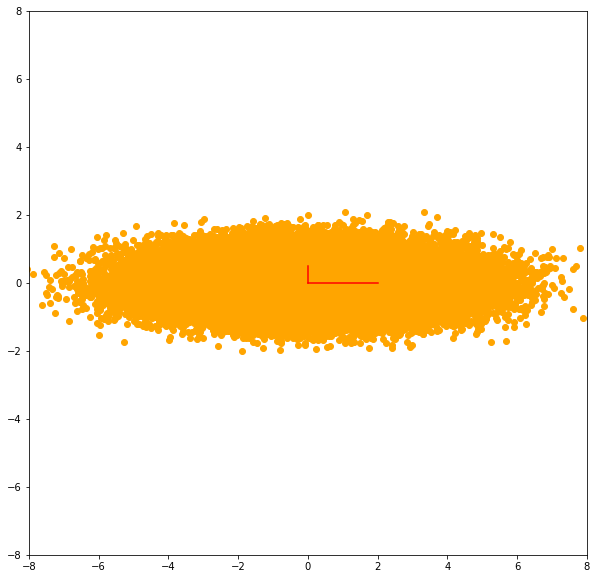

In [79]:
X_projected = U.T @ B
pc_vectors_new = (U.T @ U @ np.diag(S)).T

plt.ylim([-8, 8])
plt.xlim([-8, 8])
plt.scatter(X_projected[0], X_projected[1], c='orange')
for vector in pc_vectors_new:
  plt.plot([0, vector[0]], [0, vector[1]], c='red')

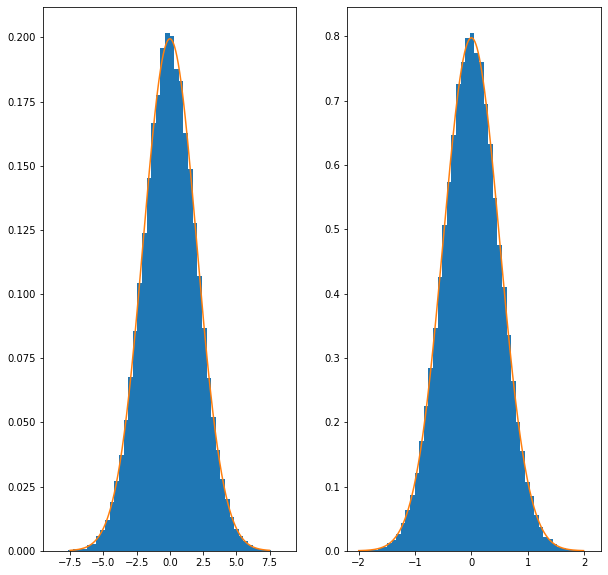

In [96]:
# check std

def normal(curve, sigma):
  return 1./(np.sqrt(2 * np.pi) * sigma) * np.exp(-np.square(curve/sigma)/2)

plt.subplot(121)
plt.hist(X_projected[0], bins=50, density=True)
curve = np.arange(-7.5, 7.5, 0.01)
plt.plot(curve, normal(curve, S[0]))

plt.subplot(122)
plt.hist(X_projected[1], bins=50, density=True)
curve = np.arange(-2, 2, 0.01)
plt.plot(curve, normal(curve, S[1]))

## Another example of PCA

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Xpd = pd.read_csv('/content/drive/MyDrive/heart.csv')
Xpd.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
X = Xpd.to_numpy().T
labels = X[-1]
X = X[:-1]

X.shape, labels.shape

((13, 303), (303,))

In [37]:
X = X - np.expand_dims(np.mean(X, axis=1), axis=-1)

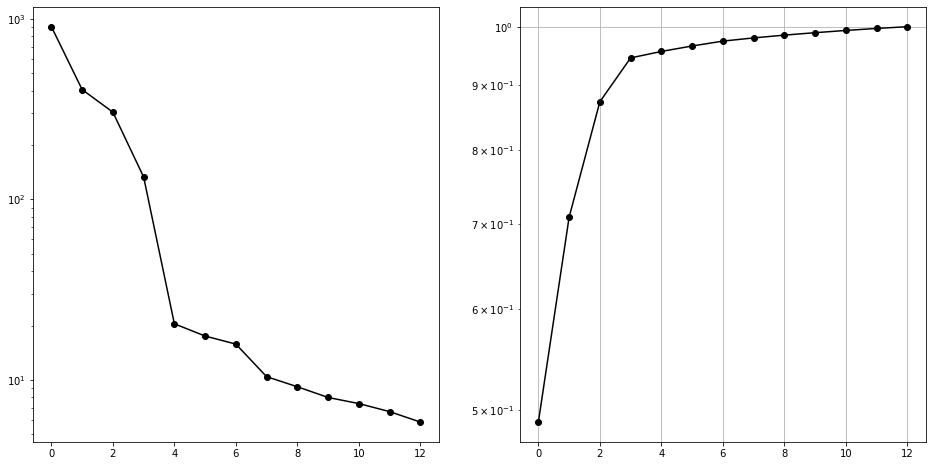

In [38]:
U, S, VT = np.linalg.svd(X)

fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', c='black')

ax1 = fig1.add_subplot(122)
ax1.semilogy(np.cumsum(S) / np.sum(S), '-o', c='black')
ax1.grid()

In [39]:
# we'll project onto the first 3 U vectors

projections = U[:, :3].T @ X
projections.shape

(3, 303)

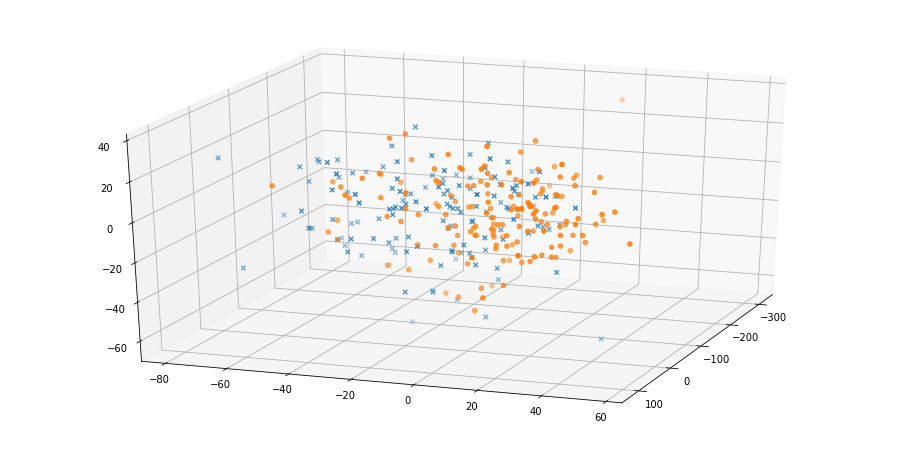

In [41]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

markers = ['x', 'o']
for i in range(2):
  dots = projections.T[labels == i]
  ax.scatter(dots[:, 0], dots[:, 1], dots[:, 2], marker=markers[i])

ax.view_init(25, 20)

#### Note: 
PCA is very fragile to outliers! Use Robust PCA (RPCA)